<a href="https://colab.research.google.com/github/asheta66/Data-Science/blob/main/DT_model_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [20]:
data = pd.read_csv('heart_disease.csv')

In [21]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [22]:
data.shape

(1025, 14)

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [24]:
from numpy.random.mtrand import random
X= data.drop('target', axis=1)
Y= data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

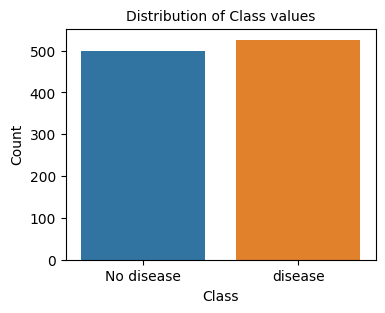

In [25]:
import seaborn as sns

class_labels ={0: 'No disease', 1 : 'disease'}
data['target_label'] = data['target'].map(class_labels)

plt.figure(figsize= (4,3))
sns.countplot(data= data, x='target_label')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class values', fontsize= 10)

plt.savefig('classes.png', dpi = 300)

plt.show()

<ipython-input-26-aeb5caa51f3b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


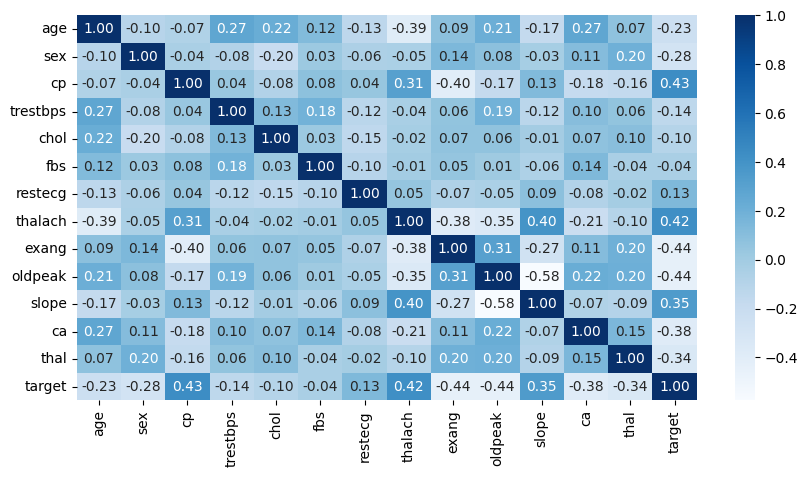

In [26]:
correlation_matrix = data.corr()

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot= True, cmap='Blues', fmt= ".2f")

plt.show()

**Feature Selection**

In [27]:
selector = SelectKBest(f_classif, k= 8)

X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

selected_features_names = X.columns[selector.get_support()]

selected_features_names

Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')

**Feature Scaling**

In [28]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train_selected)
X_test_scaled = sc.transform(X_test_selected)

**Apply DT classifier**

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth= 3, random_state= 22)
dt.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=22)

**Classification Results**

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)

train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred)
train_recall = recall_score(Y_train, y_train_pred)
train_f1 = f1_score(Y_train, y_train_pred)

In [31]:
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_f1 = f1_score(Y_test, y_test_pred)

In [32]:
results_df = pd.DataFrame ({
    'Metric':['Accuracy', 'Precision', 'Recal', 'F1_Score'],
    'Training' : [train_accuracy, test_precision, train_recall, train_f1],
    'Testing': [test_accuracy, test_precision, test_recall, test_f1]
})

results_df.T

,0,1,2,3
Metric,Accuracy,Precision,Recal,F1_Score
Training,0.85122,0.733871,0.929078,0.865639
Testing,0.780488,0.733871,0.883495,0.801762


**Confusion matrix**

In [33]:
cm_train = confusion_matrix(Y_train, y_train_pred)
cm_test = confusion_matrix(Y_test, y_test_pred)

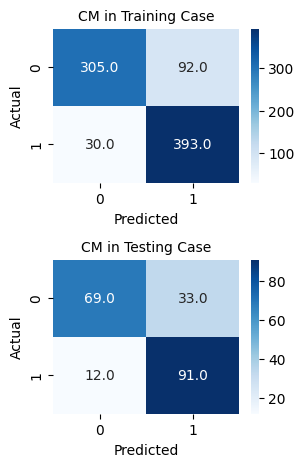

In [34]:
plt.figure(figsize= (3, 5))

plt.subplot(2, 1, 1)
sns.heatmap(cm_train, annot = True, cmap='Blues', fmt='0.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CM in Training Case', fontsize= 10)

plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 2)
sns.heatmap(cm_test, annot = True, cmap='Blues', fmt='0.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CM in Testing Case', fontsize= 10)

plt.show()

In [35]:
selected_features_names

Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')

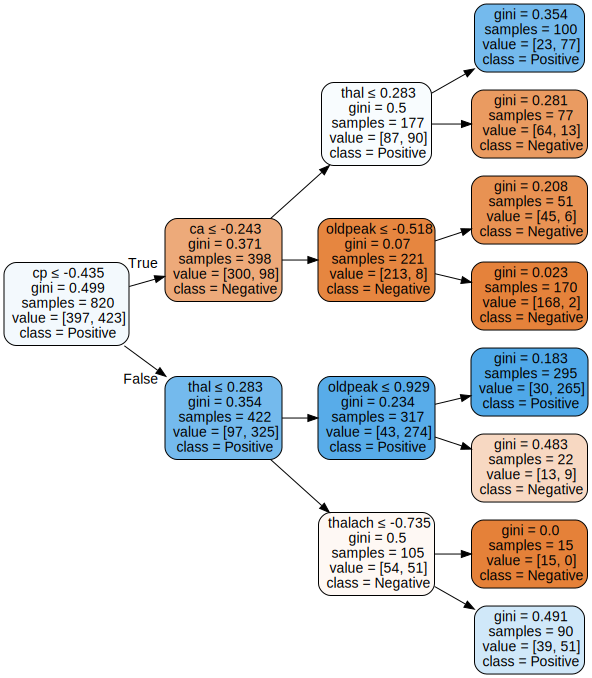

In [36]:
from sklearn.tree import export_graphviz
import graphviz

selected_feature_names =  ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Export the tree as a Graphviz dot file
dot_data = export_graphviz(dt, out_file=None, feature_names= selected_feature_names,
                           class_names=['Negative', 'Positive'], filled=True, rounded=True,
                           special_characters=True, rotate=True)

# Create a graph from the dot file
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('decision tree', view=False)

# Display the graph
graph